<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Support Vector Machines (SVM)


---

### Learning Objectives
- Understand how the SVM builds its decision threshold
- Understand the concept of the maximum margin hyperplane
- Visualize the linearly separable case in classification
- Understand the hinge loss for SVM
- Understand how the regularization constant C allows SVMs to fit non-linearly separable problems
- See how the kernel trick transforms problems from non-linearly separable to linearly separable

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-0.1">Learning Objectives</a></span></li></ul></li><li><span><a href="#Introduction-to-SVMs" data-toc-modified-id="Introduction-to-SVMs-1">Introduction to SVMs</a></span></li><li><span><a href="#How-does-the-SVM-classify?" data-toc-modified-id="How-does-the-SVM-classify?-2">How does the SVM classify?</a></span></li><li><span><a href="#Intuition-behind-the-SVM-decision-boundary" data-toc-modified-id="Intuition-behind-the-SVM-decision-boundary-3">Intuition behind the SVM decision boundary</a></span></li><li><span><a href="#Why-maximize-the-margin?" data-toc-modified-id="Why-maximize-the-margin?-4">Why maximize the margin?</a></span></li><li><span><a href="#Hinge-loss" data-toc-modified-id="Hinge-loss-5">Hinge loss</a></span></li><li><span><a href="#Hinge-loss-and-&quot;slack&quot;" data-toc-modified-id="Hinge-loss-and-&quot;slack&quot;-6">Hinge loss and "slack"</a></span></li><li><span><a href="#The-&quot;kernel-trick&quot;-for-non-linearly-separable-problems" data-toc-modified-id="The-&quot;kernel-trick&quot;-for-non-linearly-separable-problems-7">The "kernel trick" for non-linearly separable problems</a></span></li><li><span><a href="#Kernel-functions" data-toc-modified-id="Kernel-functions-8">Kernel functions</a></span><ul class="toc-item"><li><span><a href="#Kernel-Example" data-toc-modified-id="Kernel-Example-8.1">Kernel Example</a></span><ul class="toc-item"><li><span><a href="#Linear-Kernel" data-toc-modified-id="Linear-Kernel-8.1.1">Linear Kernel</a></span></li><li><span><a href="#Polynomial-Kernel" data-toc-modified-id="Polynomial-Kernel-8.1.2">Polynomial Kernel</a></span></li><li><span><a href="#Solution-(double-click)" data-toc-modified-id="Solution-(double-click)-8.1.3">Solution (double click)</a></span></li><li><span><a href="#RBF-Kernel" data-toc-modified-id="RBF-Kernel-8.1.4">RBF Kernel</a></span></li><li><span><a href="#Solution-(double-click)" data-toc-modified-id="Solution-(double-click)-8.1.5">Solution (double click)</a></span></li><li><span><a href="#Sigmoid-Kernel" data-toc-modified-id="Sigmoid-Kernel-8.1.6">Sigmoid Kernel</a></span></li><li><span><a href="#Solution-(double-click)" data-toc-modified-id="Solution-(double-click)-8.1.7">Solution (double click)</a></span></li></ul></li></ul></li><li><span><a href="#Making-predictions" data-toc-modified-id="Making-predictions-9">Making predictions</a></span></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-10">Additional resources</a></span></li></ul></div>

## Introduction to SVMs

---

The Support Vector Machine (SVM) algorithm is a different approach to classification.

SVM still fits a decision boundary like a logistic regression, but uses a different loss function called the "hinge loss" (as opposed to the log loss in logistic regression).

This lesson will overview the details of the SVM algorithm.

## How does the SVM classify?

---

It's important to start with the intuition for SVM with the special _**linearly separable**_ classification case.

If classification of observations is "linearly separable", SVM fits the **"decision boundary"** that is defined by the largest margin between the closest points for each class. This is commonly called the **"maximum margin hyperplane (MMH)"**.

![linearly separable SVM](./assets/linear_separability_vs_not.png)

## Intuition behind the SVM decision boundary

---

SVM's criterion for a decision surface is one that is _maximally far away from any data point between classes_. The distance from the decision boundary to the closest data point determines the "margin" of the classifier.

The points SVM uses to fit the decision boundary are called "support vectors".

![linearly separable SVM MMH margin](./assets/Margin.png)

## Why maximize the margin?

---

**SVM solves for a decision boundary that should theoretically minimize the generalization error.** 

Observations that are near the decision boundary between the classes are the observations with the most "ambiguous" labels. They are the observations that are approaching equal probability to be one class or the other (given the predictors).

SVM, instead of considering all the observations "equally" in the loss function it minimizes, defines its fit using the most ambiguous points. Its decision boundary is safe in that errors in new measured observations are not likely to cause the SVM to mis-classify.

The SVM is concerned with generalization to new data.

![linearly separable SVM MMH margin](./assets/linear_sep_support_vecs_math.png)

## Hinge loss

In practice, most often we will not have linear separability. Some points will enter into the margin, some might even be on the wrong side. Then the location of the decision boundary is found by optimizing the hinge loss. Observations which are outside the margin and on the correct side do not contribute to the loss. Those instead which are inside the margin or on the wrong side do contribute to the loss and are part of the support vectors.

![](assets/hinge_loss_plt.png)

## Hinge loss and "slack"

When we have a scenario where it is not possible to perfectly separate, we allow some of the points to be on the wrong side by an amount $\xi_i\ge 0$ (we do not measure how much points are on the correct side). 
We will allow only for a certain total budget of being on the wrong side:

$$
\sum_{i=1}^N\xi_i\le {\rm constant}
$$

We control this budget using a regularization constant $C$. Large values of $C$ strongly penalize being on the wrong side, low values of $C$ hardly penalize being on the wrong side. The $\xi_i$ are called **slack variables**.

In this way, we try to balance between how wide the margin should be and how much error we tolerate. Doing so allows the SVM to classify non-linearly separable problems by allowing errors to occur.

For those interested in exploring the math more, [there is a good tutorial here.](http://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/#more-457)

![soft margin](./assets/slack_variables.png)

![soft margin](./assets/soft_margin.png)

## The "kernel trick" for non-linearly separable problems

---

The "kernel trick" allows an SVM to classify non-linearly separable problems. It is a big reason why SVMs are so popular.

The idea behind the kernel trick is that you can arbitrarily transform your observations that _have no linear separability_ by putting them into a different "dimensional space" where they DO have linear separability, fit an SVM in that higher dimensional space, and then invert the transformation of the data and the model itself back into the original space.

This is done by "wrapping" your predictors in a kernel function that transforms them into this higher dimensional space. 

[Check out these lecture slides for more detail.](http://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf)

The following pictures should give you a general intuition for what is happening.

</n>
<font color = red>
You would have had the ability to separate this in such a way if you had more features in order to make the differentiation, but if you only have two features like here... you can wrap the features you do have inside a kernel function which would add the extra polynomial features in order to enable delineation

![kernel transform viz](./assets/kernel_trick.png)

![polynomial kernel](./assets/nonlinear-1.png)

![gaussian kernel](./assets/nonlinear-2.png)

## Kernel functions

Linear Kernel:

$$
K(x, x') = \langle x,x'\rangle = \sum_{i=1}^p x_i x'_i
$$

Here,
$$
\langle x,x'\rangle = \sum_{i=1}^p x_i x'_i
$$
stands for the scalar product.


dth-degree polynomial:

$$
K(x,x') = \left(r+\gamma\langle x,x'\rangle\right)^d
$$

radial basis:

$$
K(x,x') = \exp\left(-\gamma \|x-x'\|^2\right)
$$


sigmoid:

$$
K(x,x') = \tanh\left(\gamma\langle x,x'\rangle + r\right)
$$

Here,
$d$, $\gamma$, $r$ are tuning constants.

Sklearn chooses the following names for these parameters in its SVM-classifier:

- $d$ $\rightarrow$ degree (default 3)
- $\gamma$ $\rightarrow$ gamma (default 1)
- $r$ $\rightarrow$ coef0 (default 0)

The parameters only have an effect if they appear in the kernel definition.



### Kernel Example

Consider some points in a 2-dimensional feature space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

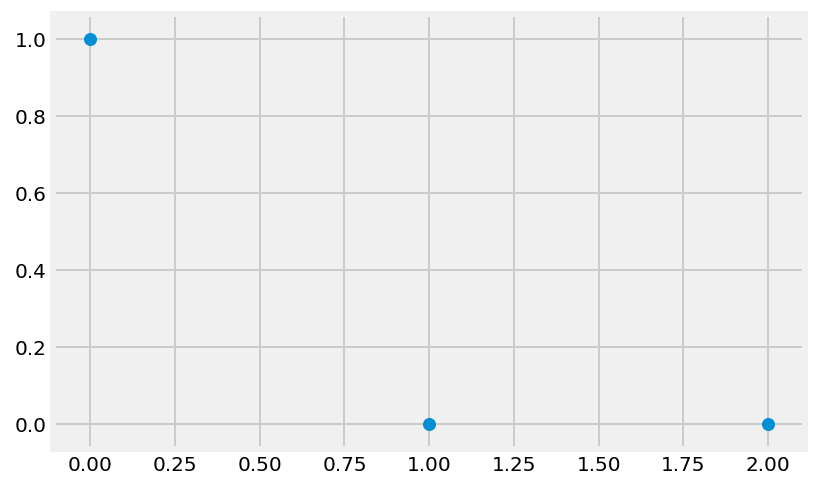

In [2]:
X = np.array([[0, 1], 
              [1, 0], 
              [2, 0]])

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel, sigmoid_kernel

#### Linear Kernel

The kernel function produces as an output a matrix containing the results of the kernel function applied to all pairwise combinations of observations. For example at position `[0, 0]`, we have the kernel function calculated between observation 0 and itself, at position `[0, 1]` we have the kernel function calculated between observation 0 and observation 1, etc.

In [4]:
linear_kernel(X)

array([[1., 0., 0.],
       [0., 1., 2.],
       [0., 2., 4.]])

To reconstruct how these values are obtained, let's use the kernel definition iterating over all possible pairs of observations.

In [5]:
for i in range(3):
    for j in range(3):
        print((i, j), np.dot(X[i], X[j]))

(0, 0) 1
(0, 1) 0
(0, 2) 0
(1, 0) 0
(1, 1) 1
(1, 2) 2
(2, 0) 0
(2, 1) 2
(2, 2) 4


We can repeat the computation with scikit-learn using other kernel functions. Have a look at the kernel implementations. Try to reconstruct all matrix elements using the formulas from above. Play around with the kernel parameters.

> **Hints:**
- Calculate $\|x-x'\|$ with `np.linalg.norm(x-x')`.
- $\tanh(x)$ is calculated with `np.tanh(x)`.

#### Polynomial Kernel

In [33]:
coef0 = 1
gamma = 1
degree = 2
pk = polynomial_kernel(X, degree=degree, gamma=gamma, coef0=coef0)
pk

array([[ 4.,  1.,  1.],
       [ 1.,  4.,  9.],
       [ 1.,  9., 25.]])

dth-degree polynomial:

$$
K(x,x') = \left(r+\gamma\langle x,x'\rangle\right)^d
$$

In [34]:
for i in range(3):
    for j in range(3):
        print((i, j), (coef0+gamma*np.dot(X[i], X[j]))**degree)

(0, 0) 4
(0, 1) 1
(0, 2) 1
(1, 0) 1
(1, 1) 4
(1, 2) 9
(2, 0) 1
(2, 1) 9
(2, 2) 25


#### Solution (double click)

<span style="color:white;font-family:'Courier New'"><br/>
for i in range(3):
    for j in range(3):
        print((i, j), (coef0+gamma*np.dot(X[i], X[j]))**degree)
</span>

#### RBF Kernel

In [26]:
gamma = 0.5
rbf_kernel(X, gamma=gamma)

array([[1.        , 0.36787944, 0.082085  ],
       [0.36787944, 1.        , 0.60653066],
       [0.082085  , 0.60653066, 1.        ]])

radial basis:

$$
K(x,x') = \exp\left(-\gamma \|x-x'\|^2\right)
$$

In [27]:
for i in range(3):
    for j in range(3):
        print((i, j), np.exp(-gamma*np.linalg.norm(X[i] - X[j])**2))

(0, 0) 1.0
(0, 1) 0.3678794411714422
(0, 2) 0.08208499862389876
(1, 0) 0.3678794411714422
(1, 1) 1.0
(1, 2) 0.6065306597126334
(2, 0) 0.08208499862389876
(2, 1) 0.6065306597126334
(2, 2) 1.0


#### Solution (double click)

<span style="color:white;font-family:'Courier New'"><br/>
for i in range(3):
    for j in range(3):
        print((i, j), np.exp(-gamma*np.linalg.norm(X[i]-X[j])**2))
</span>

#### Sigmoid Kernel

In [23]:
gamma = 1
coef0 = 0
sigmoid_kernel(X, gamma=gamma, coef0=coef0)

array([[0.76159416, 0.        , 0.        ],
       [0.        , 0.76159416, 0.96402758],
       [0.        , 0.96402758, 0.9993293 ]])

sigmoid:

$$
K(x,x') = \tanh\left(\gamma\langle x,x'\rangle + r\right)
$$

In [24]:
for i in range(3):
    for j in range(3):
        print((i, j), np.tanh(gamma*np.dot(X[i], X[j])+coef0))

(0, 0) 0.7615941559557649
(0, 1) 0.0
(0, 2) 0.0
(1, 0) 0.0
(1, 1) 0.7615941559557649
(1, 2) 0.9640275800758169
(2, 0) 0.0
(2, 1) 0.9640275800758169
(2, 2) 0.999329299739067


#### Solution (double click)

<span style="color:white;font-family:'Courier New'"><br/>
for i in range(3):
    for j in range(3):
        print((i, j), np.tanh(gamma*np.dot(X[i], X[j])+coef0))
</span>

## Making predictions

A prediction for any point $x$ is made by calculating the kernel for this point paired up with all the support vectors:

$$
\hat{f}(x) = \sum_{i=1}^N \hat\alpha_i y_i K(x,x_i) + \hat{\beta}_0
$$

The coefficients $\hat{\alpha}_i$ are the so-called dual coefficients. They are only different from zero if $x_i$ is a support vector, so the sum effectively runs only over the support vectors. Binary class labels $y_i$ have to be encoded as plus or minus one. Like in AdaBoost, the predicted label is obtained by just checking the sign of the prediction $\hat{f}(x)$.

## Additional resources

---

- [For a really great resource check out these slides (some of which are cannabalized in this lecture).](http://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf)
- [This website is also a great resource, on a slightly more technical level.](http://nlp.stanford.edu/IR-book/html/htmledition/support-vector-machines-the-linearly-separable-case-1.html)
- SVM docs on [SKLearn](http://scikit-learn.org/stable/modules/svm.html)
- Iris example on [SKLearn](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#example-svm-plot-iris-py)
- Hyperplane walkthrough on [SKLearn](http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py)
- A comprehensive [user guide](http://pyml.sourceforge.net/doc/howto.pdf) to SVM. My fav!
- A [blog post tutorial](http://www.svm-tutorial.com/2014/11/svm-understanding-math-part-2/) of understanding the linear algebra behind SVM hyperplanes. Check [part 3](http://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/) of this blog on finding the optimal hyperplane
- This [Quora discussion](https://www.quora.com/How-do-you-teach-Support-Vector-Machine-to-a-beginner-in-Machine-Learning) includes a high-level overview plus a [20min video](https://www.youtube.com/watch?v=aDbsJ_S3tIA) walking through the core "need-to-knows"
- A [slideshow introduction](http://www.cs.columbia.edu/~kathy/cs4701/documents/jason_svm_tutorial.pdf) to the optimization considerations of SVM
- A second [slideshow overview from UCF](http://www.cs.ucf.edu/courses/cap6412/fall2009/papers/Berwick2003.pdf) on the highnotes of SVM
- Andrew Ng's [notes](http://cs229.stanford.edu/notes/cs229-notes3.pdf) on SVM from CS 229
- A [FULL LECTURE](https://www.youtube.com/watch?v=eHsErlPJWUU) (1hr+) from one of my fav lecturers (Dr Yasser) on SVM. He does a followup on [kernel tricks](https://www.youtube.com/watch?v=XUj5JbQihlU) too
- A [FULL LECTURE](https://www.youtube.com/watch?v=_PwhiWxHK8o) (50min) (from MIT Opencoursewar)
- A famous [paper](https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf) (cited 9000+ times!) on why SVM is a great text classifier
- An [advanced discussion](http://www.icml-2011.org/papers/386_icmlpaper.pdf) of SVMs as probabilistic models